In [1]:
import pandas as pd

df = pd.read_csv("student_data.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
df.shape


(395, 33)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.isnull().sum()


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [5]:
df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
# Separate features and target
X = df.drop("G3", axis=1)
y = df["G3"]

# Verify shapes
X.shape, y.shape


((395, 32), (395,))

In [7]:
# Identify categorical columns
df.select_dtypes(include='object').columns


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Encode all categorical (object) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [9]:
from sklearn.preprocessing import StandardScaler

# Separate X and y again (after encoding)
X = df.drop("G3", axis=1)
y = df["G3"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check result
X_scaled.shape


(395, 32)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((316, 32), (79, 32), (316,), (79,))

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [12]:
# Build Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')  # Regression output (predicting G3)
])

# Compile model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# View model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the neural network
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 130.4030 - mae: 10.3962 - val_loss: 112.6885 - val_mae: 9.8995
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 114.1080 - mae: 9.7840 - val_loss: 90.9317 - val_mae: 8.9143
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 83.4053 - mae: 8.4298 - val_loss: 69.9324 - val_mae: 7.7969
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 69.3888 - mae: 7.7320 - val_loss: 49.2512 - val_mae: 6.4786
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 50.8935 - mae: 6.4357 - val_loss: 31.7968 - val_mae: 5.1442
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31.0782 - mae: 4.9835 - val_loss: 20.1124 - val_mae: 3.8778
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.6537 - mae: 3.7699 - val_loss: 14.4628 - val_mae: 2.9280
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14.9256 - mae: 3.1584 - val_loss: 12.7254 - val_mae: 2.4170
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.

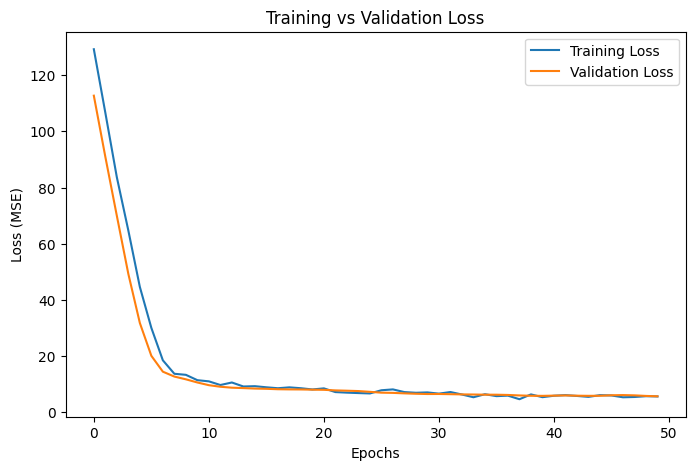

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


(1.8274670839309692, 6.239985942840576, 0.6956853866577148)

In [16]:
# Save the trained baseline neural network model
model.save("baseline_student_performance_nn.h5")


In [17]:
# Train the same model with more epochs (Iteration 1)
history_epoch_100 = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5.2999 - mae: 1.8230 - val_loss: 5.6184 - val_mae: 1.8608
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 6.2512 - mae: 1.9793 - val_loss: 5.6430 - val_mae: 1.8647
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 4.5505 - mae: 1.6610 - val_loss: 5.6463 - val_mae: 1.8777
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.1765 - mae: 1.8499 - val_loss: 5.7809 - val_mae: 1.8893
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.9650 - mae: 1.7833 - val_loss: 5.9987 - val_mae: 1.8942
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.5157 - mae: 1.7082 - val_loss: 6.1829 - val_mae: 1.9132
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1514 - mae: 1.8175 - val_loss: 6.0291 - val_mae: 1.8903
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1865 - mae: 1.8425 - val_loss: 5.7302 - val_mae: 1.8525
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1122 - mae: 

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using Iteration-1 model
y_pred_iter1 = model.predict(X_test)

# Metrics for Iteration-1
mae_iter1 = mean_absolute_error(y_test, y_pred_iter1)
mse_iter1 = mean_squared_error(y_test, y_pred_iter1)
r2_iter1 = r2_score(y_test, y_pred_iter1)

mae_iter1, mse_iter1, r2_iter1


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


(1.7184900045394897, 6.259928226470947, 0.6947128772735596)

In [19]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": [
        "Baseline NN (50 epochs)",
        "Epoch Tuned NN (100 epochs)"
    ],
    "MAE": [
        mae,          # baseline MAE (from earlier)
        mae_iter1     # iteration-1 MAE
    ],
    "MSE": [
        mse,
        mse_iter1
    ],
    "R2 Score": [
        r2,
        r2_iter1
    ]
})

comparison_df


,Model,MAE,MSE,R2 Score
0,Baseline NN (50 epochs),1.827467,6.239986,0.695685
1,Epoch Tuned NN (100 epochs),1.718490,6.259928,0.694713


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Deeper neural network (Iteration 2)
model_deep = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

model_deep.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model_deep.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,593 (57.00 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the deeper neural network (Iteration 2)
history_deep = model_deep.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 127.1961 - mae: 10.3176 - val_loss: 101.7199 - val_mae: 9.3895
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 102.5243 - mae: 9.2220 - val_loss: 75.1490 - val_mae: 8.0392
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 73.8018 - mae: 7.7980 - val_loss: 47.4896 - val_mae: 6.2320
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 48.1292 - mae: 6.1359 - val_loss: 25.3826 - val_mae: 4.2567
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 34.3743 - mae: 4.8734 - val_loss: 16.0644 - val_mae: 3.1348
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 27.8502 - mae: 4.2820 - val_loss: 13.2160 - val_mae: 2.6940
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 22.4978 - mae: 3.7740 - val_loss: 10.9335 - val_mae: 2.4863
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 17.6827 - mae: 3.3340 - val_loss: 10.0567 - val_mae: 2.5544
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 22.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using deeper model
y_pred_deep = model_deep.predict(X_test)

# Metrics for Iteration 2 (deeper model)
mae_deep = mean_absolute_error(y_test, y_pred_deep)
mse_deep = mean_squared_error(y_test, y_pred_deep)
r2_deep = r2_score(y_test, y_pred_deep)

mae_deep, mse_deep, r2_deep


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


(2.118593454360962, 7.6041483879089355, 0.629157304763794)

In [23]:
import pandas as pd

comparison_all = pd.DataFrame({
    "Model": [
        "Baseline NN (50 epochs)",
        "Epoch Tuned NN (100 epochs)",
        "Deeper NN (128-64-32)"
    ],
    "MAE": [
        mae,
        mae_iter1,
        mae_deep
    ],
    "MSE": [
        mse,
        mse_iter1,
        mse_deep
    ],
    "R2 Score": [
        r2,
        r2_iter1,
        r2_deep
    ]
})

comparison_all


,Model,MAE,MSE,R2 Score
0,Baseline NN (50 epochs),1.827467,6.239986,0.695685
1,Epoch Tuned NN (100 epochs),1.718490,6.259928,0.694713
2,Deeper NN (128-64-32),2.118593,7.604148,0.629157


## Model Comparison Summary

Three neural network models were evaluated:
1. A baseline neural network trained for 50 epochs.
2. An epoch-tuned neural network trained for 100 epochs.
3. A deeper neural network with an additional hidden layer.

All models were trained using the same preprocessing pipeline and evaluated on
the same test dataset to ensure a fair comparison.


## Final Model Selection

Based on comparative evaluation, the baseline neural network trained for 50 epochs
was selected as the final model. Although epoch tuning reduced MAE, it did not
improve overall generalization. The deeper neural network showed clear overfitting.

Therefore, the baseline model was chosen due to its stable performance and better
generalization capability.


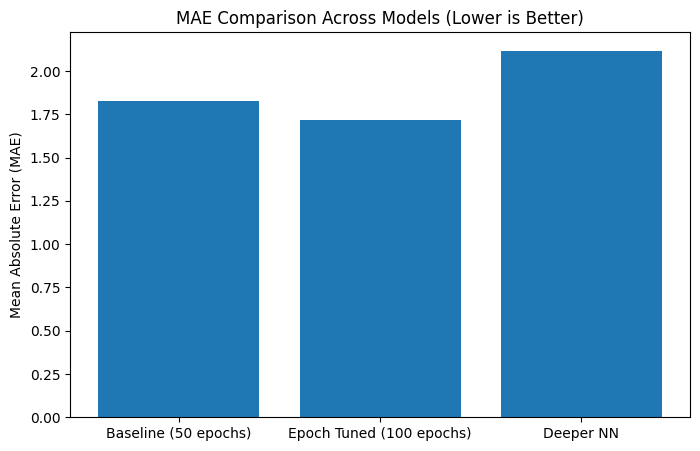

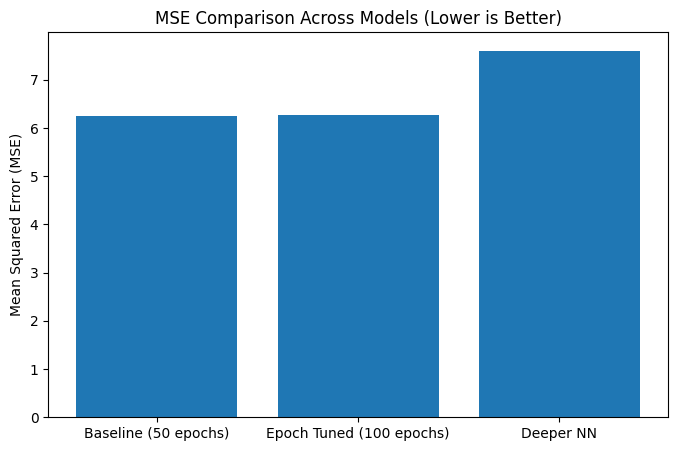

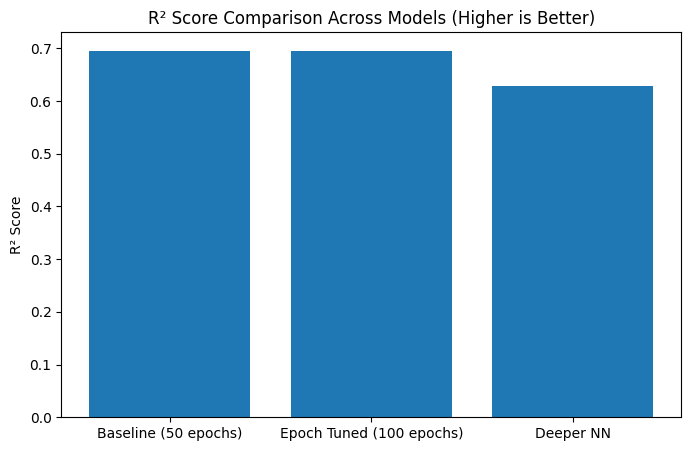

In [26]:
import matplotlib.pyplot as plt

models = [
    "Baseline (50 epochs)",
    "Epoch Tuned (100 epochs)",
    "Deeper NN"
]

mae_values = [mae, mae_iter1, mae_deep]
mse_values = [mse, mse_iter1, mse_deep]
r2_values = [r2, r2_iter1, r2_deep]

# MAE Plot
plt.figure(figsize=(8,5))
plt.bar(models, mae_values)
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE Comparison Across Models (Lower is Better)")
plt.show()

# MSE Plot
plt.figure(figsize=(8,5))
plt.bar(models, mse_values)
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE Comparison Across Models (Lower is Better)")
plt.show()

# R2 Plot
plt.figure(figsize=(8,5))
plt.bar(models, r2_values)
plt.ylabel("R² Score")
plt.title("R² Score Comparison Across Models (Higher is Better)")
plt.show()


## Performance Metric Visualizations

The MAE, MSE, and R² visualizations collectively illustrate the performance of
all evaluated neural network models.

Although the epoch-tuned model achieved the lowest MAE, it exhibited slightly
higher MSE and lower R² compared to the baseline model. The deeper neural network
performed worse across all metrics, indicating overfitting.

Considering all metrics together, the baseline neural network demonstrated the
most stable and consistent generalization performance and was therefore selected
as the final model.
